<a href="https://colab.research.google.com/github/akashbalor123/Machine-Learning/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required Packages , import XGboost as it follows XGBoost model

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

import California_housing file

In [45]:
data = fetch_california_housing()

In [46]:
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [47]:
dataset = pd.DataFrame(data.data,columns=data.feature_names)

In [48]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Combine Data and target value into single dataset

In [49]:
dataset['target'] = data.target

In [50]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [51]:
dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


Create a correlation and visualize the heatmap of it

<Axes: >

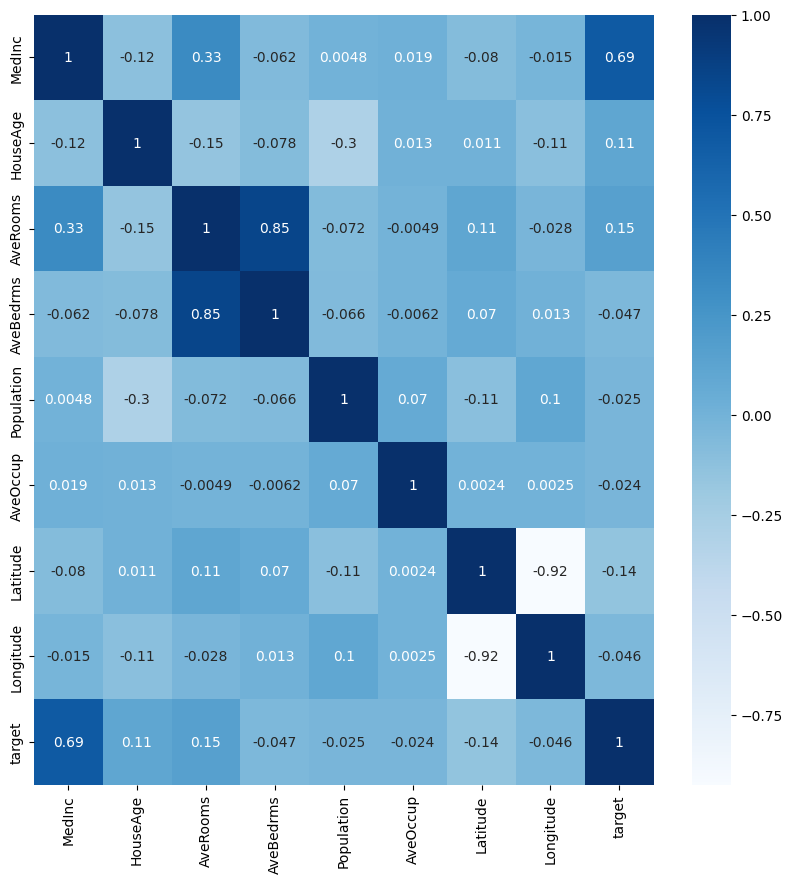

In [52]:
correlation = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, cmap='Blues', annot=True,)

Split X and Y for training the data

In [53]:
X = dataset.drop(['target'],axis=1)
y = dataset['target']

Use Train_test_split to train the Model

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Use XGBoost Regressor to train the model as it is Regression based Model

In [55]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Predict the Training data and calculate r2 score, mean absolute score and use scatter plot to see actual price and predict prize of trining data

In [64]:
y_train_pred = model.predict(X_train)

In [66]:
train_score1 = r2_score(y_train_pred, y_train)
train_score2 = (y_train_pred, y_train)

In [67]:
print(f"The r2_score of train is {train_score1}")
print(f"The mean absolute error of train is {train_score2}")

The r2_score of train is 0.9374761324742483
The mean absolute error of train is (array([0.5523039, 3.0850039, 0.5835302, ..., 1.9204227, 1.952873 ,
       0.6768683], dtype=float32), 2072     0.720
10600    2.741
2494     0.583
4284     2.000
16541    1.179
         ...  
1099     0.938
18898    1.031
11798    1.926
6637     1.535
2575     0.811
Name: target, Length: 16512, dtype: float64)


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

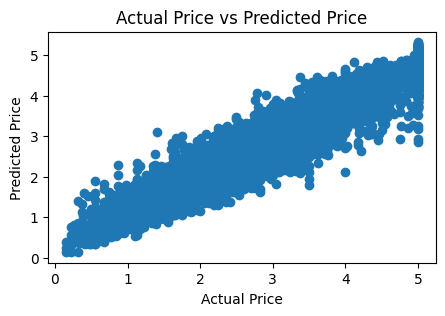

In [68]:
plt.figure(figsize=(5,3))
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

Predict the Test data and calculate r2 score, mean absolute score and use scatter plot to see actual price and predict prize of trest data

In [69]:
y_test_pred = model.predict(X_test)

In [73]:
test_score1 = r2_score(y_test_pred, y_test)

In [74]:
test_score2 = mean_absolute_error(y_test_pred, y_test)

In [75]:
print(f"The r2_score is {test_score1}")
print(f"The mean absolute error is {test_score2}")

The r2_score is 0.8096220578597938
The mean absolute error is 0.3108631800268186


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

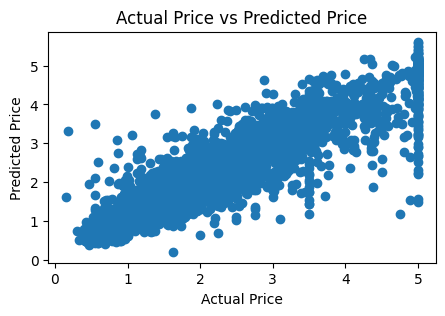

In [76]:
plt.figure(figsize=(5,3))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

predict the price for new data using test file

In [80]:
new_data = [[8.3252,41.0,6.984126984126984,1.0238095238095237,322.0,2.5555555555555554,37.88,-122.23]]
prediction = model.predict(new_data)
print(f"The Prediction for new data is {prediction}")

The Prediction for new data is [4.3000865]


Procedure to download sklearn.dataset file to csv file

In [77]:
dataset.to_csv('california_housing.csv', index=False)
from google.colab import files
files.download('california_housing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>